<a href="https://colab.research.google.com/github/kazimhsayed/Computational-Dynamics/blob/main/Assignment2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Even though Backward Euler is an unconditionally stable scheme it is not very accurate as is demonstrated by this example where the Analytic solution has an exponential term which is taked to zero because of the choice of the initial value.

Backward Euler slightly overestimates the solution in the first few steps where as all the forward schemes slightly underestimate it enabling slightly positive and negative terms for the constant in front of exp(5x) respectively leading to the deviations we observe.

This is important to notice to understand that stability is not the same as accuracy.

'''

The solution to the differential equation:
dy/dx=-5x**2 + 5y

dy/dx-5.y=-5.x**2
I.F.= exp(integral(-5*dx))=exp(-5x)

multiplying both sides by I.F.
and substituting d/dx(exp(-5x))=-5(exp(-5x))

exp(-5x).dy/dx + y.d/dx(exp(-5x))=-5.exp(-5x).x***2
Applying the reverse product rule:
d/dx(y.exp(-5x))=-5(exp(-5x))

Integrating both sides and rearranging we get the solution:
y=x**2+2x/5+2/25+c.exp(5x)

where c is zero for our ideal given case

'''

In the numerical the initially non existent value of c pops back up due to errors in the steps and we can see how a small negative value of c will match the forward schemes and small positive one will match the Backward Euler


For N=25:
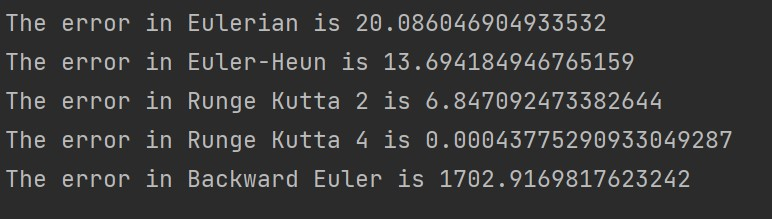

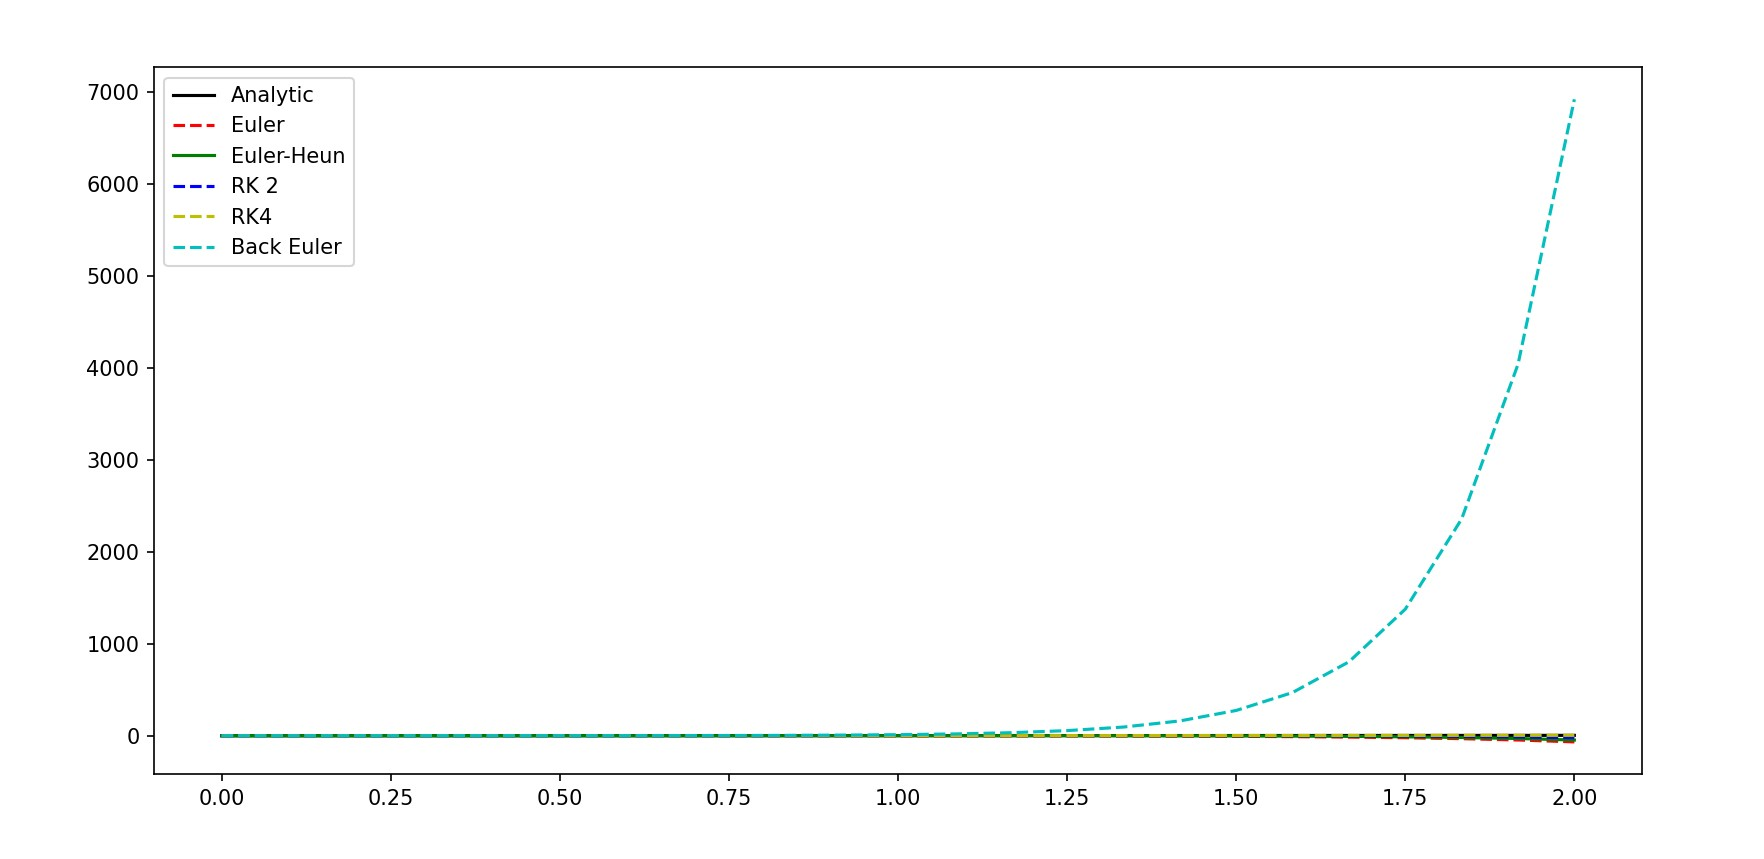

For N=250:
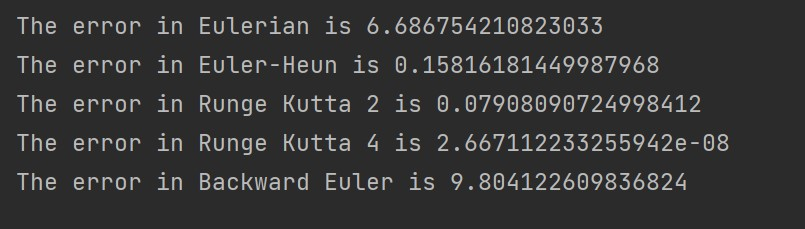
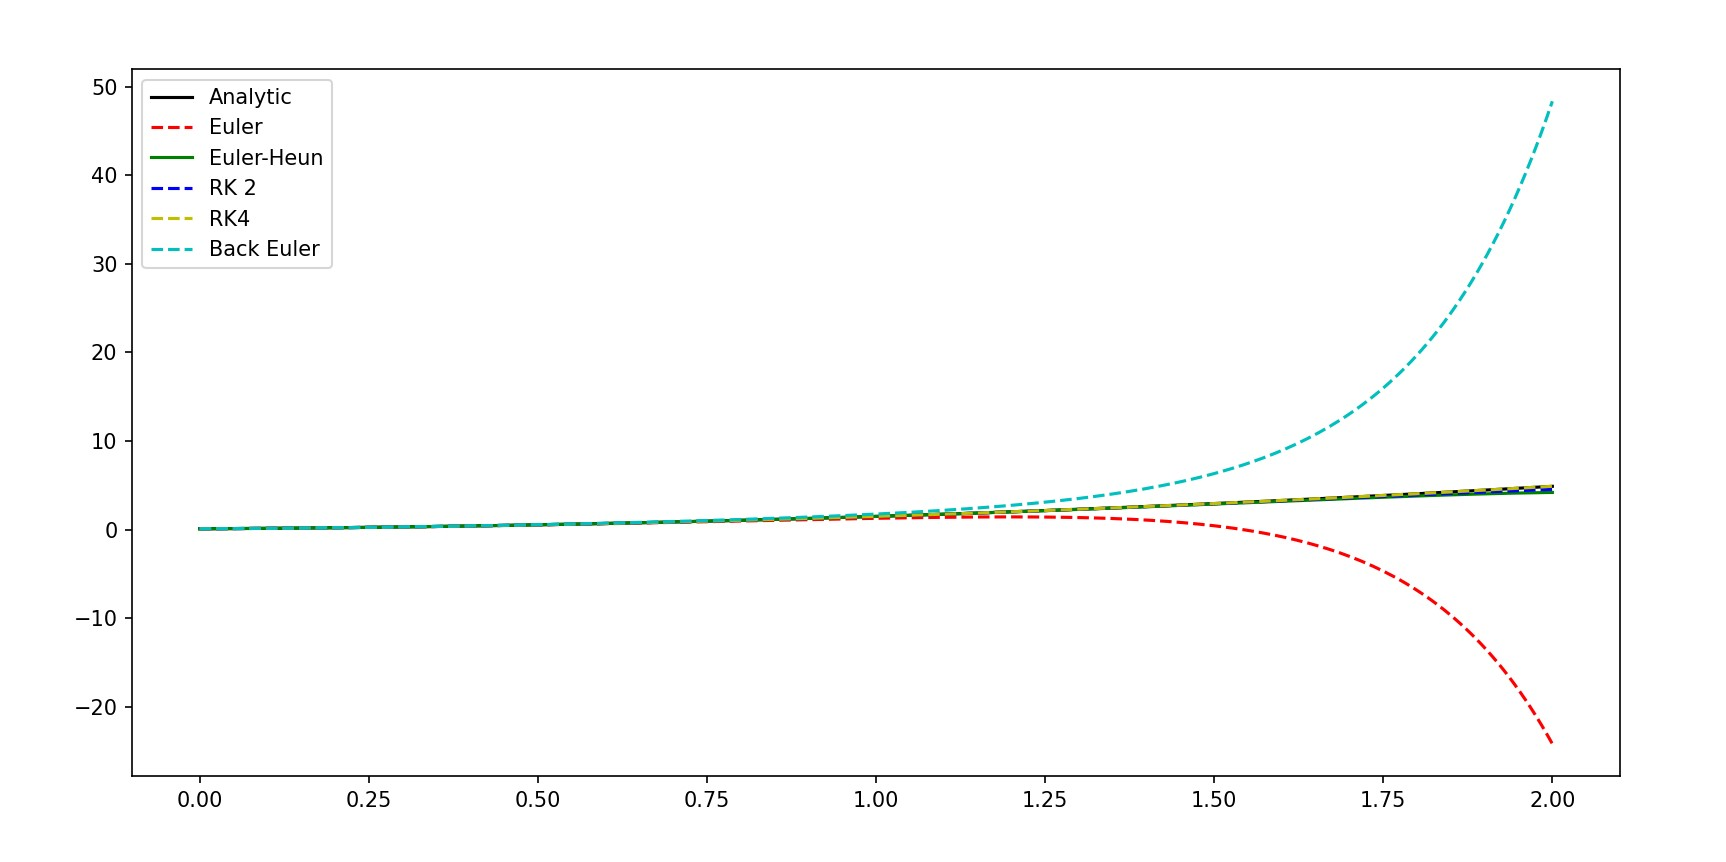

For N=2500:
Output is in code's output.
Feel free to change it to your liking.!

The error in Eulerian is 0.7748732271500627        
The error in Euler-Heun is 0.0015768500172781722        
The error in Runge Kutta 2 is 0.000788425008803054       
The error in Runge Kutta 4 is 2.5570008128283198e-12       
The error in Backward Euler is 0.8049068675113469


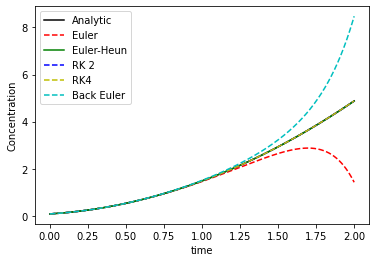

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.optimize import fsolve
'''Enter Parameters and function here'''
x_initial=0
x_final=2


'''Enter the Number of points you want here''' 
N=2500


def fxy(x,y):
    return 5*y-5*x**2

'''This is the independent variable, instead of 't' I am writing 'x'  '''
x=np.linspace(x_initial,x_final,N)
h=x[1]-x[0]

'''Empty rrays for different methods'''
y_eulerian=np.zeros(N)
y_eulerheun=np.zeros(N)
y_rk2=np.zeros(N)
y_rk4=np.zeros(N)
y_backwardeuler=np.zeros(N)

'''The Analaytical solution here please'''
y=x**2+2*x/5+2/25


'''Defining the initial condition'''
y_eulerian[0] = y[0]
y_eulerheun[0] = y[0]
y_rk2[0] = y[0]
y_rk4[0] = y[0]
y_backwardeuler[0] = y[0]

'''For Backward Euler, this is the equation whose roots we will find'''
def backward_euler_residual ( y_n, f, h, y_nminusone ,x_n ):
  return  y_n - y_nminusone - h * f(x_n,y_n )


'''This is where all the numerical work happens'''
for i in range(0, N - 1):
    # Eulerian
    y_eulerian[i + 1] = y_eulerian[i] + h * fxy(x[i], y_eulerian[i])
    # Euler huen
    Ystar = y_eulerheun[i] + h * fxy(x[i], y_eulerheun[i])
    y_eulerheun[i + 1] = y_eulerheun[i] + 0.5 * h * (fxy(x[i], y_eulerheun[i]) + fxy(x[i + 1], Ystar))
    # Runge Kutta 2
    k1_rk2 = h * fxy(x[i], y_rk2[i])
    k2_rk2 = h * fxy(x[i] + h / 2, y_rk2[i] + k1_rk2 / 2)
    y_rk2[i + 1] = y_rk2[i] + k2_rk2
    # Runge Kutta 4
    k1_rk4 = h * fxy(x[i], y_rk4[i])
    k2_rk4 = h * fxy(x[i] + h / 2, y[i] + k1_rk4 / 2)
    k3_rk4 = h * fxy(x[i] + h / 2, y[i] + k2_rk4 / 2)
    k4_rk4 = h * fxy(x[i + 1], y[i] + k3_rk4)
    y_rk4[i + 1] = y_rk4[i] + (k1_rk4 + 2 * k2_rk4 + 2 * k3_rk4 + k4_rk4) / 6
    #Backward Euler(I am using Fsolve to get the roots of the equation on line 38)
    y_backwardeuler[i+1] = fsolve(backward_euler_residual, y_backwardeuler[i], args = (fxy , h , y_backwardeuler[i], x[i+1]))


'''The Errors'''
sigma_eulerian=np.sqrt(np.sum((y_eulerian-y)**2)/N)
sigma_eulerheun=np.sqrt(np.sum((y_eulerheun-y)**2)/N)
sigma_rk2=np.sqrt(np.sum((y_rk2-y)**2)/N)
sigma_rk4=np.sqrt(np.sum((y_rk4-y)**2)/N)
sigma_backwardeuler = np.sqrt(np.sum((y_backwardeuler - y) ** 2) / N)

'''The plots'''
plt.plot(x,y,'k',label='Analytic')
plt.plot(x,y_eulerian,'r--',label='Euler')
plt.plot(x,y_eulerheun,'g',label='Euler-Heun')
plt.plot(x,y_rk2,'b--',label='RK 2')
plt.plot(x,y_rk4,'y--',label='RK4')
plt.plot(x, y_backwardeuler, 'c--',label='Back Euler')
plt.legend()
plt.xlabel('time')
plt.ylabel('Concentration')

print('The error in Eulerian is',sigma_eulerian,'       ')
print('The error in Euler-Heun is',sigma_eulerheun,'       ')
print('The error in Runge Kutta 2 is',sigma_rk2,'      ')
print('The error in Runge Kutta 4 is',sigma_rk4,'      ',)
print('The error in Backward Euler is',sigma_backwardeuler)

plt.show()


The Analytic Solution to the advection equation is rather simple(Replacing x with x-lambda.t).

But the finite difference schemes we adapt here are not universally applicable as is seen with the inability of the second order Lax Wendroff and Mac cormack to match the square pulse(Both of them are almost on top of each other as are Euler heun and RK2 in ODEs)

The Animation takes time to render here, as Colab does not directly display it like my pycharm notebook does, but displaying it in HTML5 format works with time

In [ ]:
'''I am seperating the calculation and animation part, please run the Animation after running the code calculation you desire'''

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'''The Independent variables'''
x_initial = -10
x_final = 10
N = 200
x = np.linspace(x_initial,x_final,N)
h = x[1]-x[0]


t_initial = 0
t_final = 25
dt = 0.01
M = int((t_final-t_initial)/dt)
t = np.linspace(t_initial,t_final,M)
dt = t[1]-t[0]

'''Empty 2-D arrays for Solutions'''
u_analytic = np.zeros([len(x),len(t)])
u_ftcs = np.zeros([len(x),len(t)])
u_upwind = np.zeros([len(x),len(t)])
u_lax = np.zeros([len(x),len(t)])
u_maccormack = np.zeros([len(x),len(t)])
u_laxwendroff = np.zeros([len(x),len(t)])



'''Values for the function and defining the Analytic function that moves periodically with time'''
sigma=1
lambdaa=10

def analytic(t,x):
    while x-lambdaa*t<x_initial:
      x=x+(x_final-x_initial)         #When Lambda is Positive and these values of x go beyond the Range we are interested and periodically moving in
    while x - lambdaa*t>x_final:
      x=x-(x_final-x_initial)         #Same foe when Kambda is negative
    return 1/(sigma*(2*np.pi)**0.5)*np.exp(-(x-lambdaa*t)**2/(2*sigma))         #Enter The Analytic Function here(Time dependent)

'''Setting the Initial Conditions'''

for i in range(0,N):
  u_analytic[i,0] = analytic(t[0],x[i])

u_ftcs[:,0] = u_analytic[:,0]
u_upwind[:,0] = u_analytic[:,0]
u_lax[:,0] = u_analytic[:,0]
u_maccormack[:,0] = u_analytic[:,0]
u_laxwendroff[:,0] = u_analytic[:,0]





for n in range(0,M-1):

    for i in range (0,N):
        u_analytic[i,n+1] = analytic(t[n+1],x[i])

        #I am writing j instead of i-1 and k instead of i+1 to save myself from the boundary condition problem as I can simply redefine j and k in those situations
        j=i-1
        k=i+1
        if j<0:
          j=N-1
        if k>N-1:
          k=0

        #All the Methods asked for, computed here:
        u_ftcs[i,n+1] = u_ftcs[i,n] - lambdaa*dt/(2*h)*(u_ftcs[k,n]-u_ftcs[j,n])
        
        if lambdaa>0:
          u_upwind[i,n+1] = u_upwind[i,n] - lambdaa*dt/(h)*(u_upwind[i,n]-u_upwind[j,n])
        if lambdaa<=0:
          u_upwind[i,n+1] = u_upwind[i,n] - lambdaa*dt/(h)*(u_upwind[k,n]-u_upwind[i,n])
        
        u_lax[i,n+1] = 0.5*(u_lax[j,n]+u_lax[k,n]) - lambdaa*dt/(2*h)*(u_lax[k,n]-u_lax[j,n])
        
        umc1 = u_maccormack[i,n] - lambdaa*dt/(h)*(u_maccormack[k,n] - u_maccormack[i,n])
        umc2 = u_maccormack[j,n] - lambdaa*dt/(h)*(u_maccormack[i,n] - u_maccormack[j,n])
        u_maccormack[i,n+1] = 0.5*(u_maccormack[i,n]+umc1)+lambdaa*dt/(2*h)*(umc2-umc1)

        u_laxwendroff[i,n+1] = u_laxwendroff[i,n] - lambdaa*dt/(2*h)*(u_laxwendroff[k,n]-u_laxwendroff[j,n]) +0.5*(lambdaa*dt/(h))**2*(u_laxwendroff[k,n]+u_laxwendroff[j,n]-2*u_laxwendroff[i,n])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars


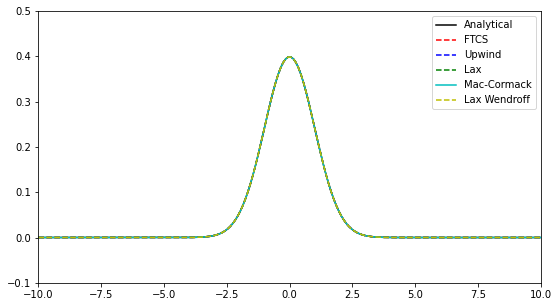

In [ ]:
'''This is to Animate and display the results'''
#This takes time on Google colab since it won't directly display the video and needs to be converted to html5 format
#(Expected time 6.5 minutes for dt=0.01 in the given problem)

import matplotlib
import matplotlib.animation as animation
from IPython.display import HTML
fig=plt.figure(figsize=(9,5))

n=10   #Decrease if you want smoother video that'll take more time(Let it be 1 for dt=0.1, and 10 or more for dt=0.001)
def animate(v):
    v=n*v
    plt.clf()
    plt.plot(x,u_analytic[:,v],'k',label='Analytical')
    plt.plot(x,u_ftcs[:,v],'r--',label='FTCS')
    plt.plot(x,u_upwind[:,v],'b--',label='Upwind')
    plt.plot(x,u_lax[:,v],'g--',label='Lax')
    plt.plot(x,u_maccormack[:,v],'c',label='Mac-Cormack')
    plt.plot(x,u_laxwendroff[:,v],'y--',label='Lax Wendroff')
    plt.legend()
    plt.xlim(-10,10)
    plt.ylim(-0.1,0.5)
ani = animation.FuncAnimation(fig, animate, frames=int(len(t)/n), interval=4000*n*dt)
matplotlib.rcParams['animation.embed_limit'] = 2**(246*4)
HTML(ani.to_html5_video())




The Rectangular Wave pulse is below:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

'''The Independent variables'''
x_initial = -10
x_final = 10
N = 200
x = np.linspace(x_initial,x_final,N)
h = x[1]-x[0]


t_initial = 0
t_final = 25
dt = 0.01
M = int((t_final-t_initial)/dt)
t = np.linspace(t_initial,t_final,M)
dt = t[1]-t[0]

'''Empty 2-D arrays for Solutions'''
u_analytic = np.zeros([len(x),len(t)])
u_ftcs = np.zeros([len(x),len(t)])
u_upwind = np.zeros([len(x),len(t)])
u_lax = np.zeros([len(x),len(t)])
u_maccormack = np.zeros([len(x),len(t)])
u_laxwendroff = np.zeros([len(x),len(t)])



'''Values for the function and defining the Analytic function that moves periodically with time'''

lambdaa=10        #Enter Lambda or Velocity here



width_square_pulse=0.5
height_square_pulse=2

def analytic(t,x):
    while x-lambdaa*t<x_initial:
      x=x+(x_final-x_initial)
    while x - lambdaa*t>x_final:
      x=x-(x_final-x_initial)
    y=0
    if np.abs(x-lambdaa*t)<width_square_pulse:
      y=height_square_pulse
    return y



'''Setting the Initial Conditions'''

for i in range(0,N):
  u_analytic[i,0] = analytic(t[0],x[i])

u_ftcs[:,0] = u_analytic[:,0]
u_upwind[:,0] = u_analytic[:,0]
u_lax[:,0] = u_analytic[:,0]
u_maccormack[:,0] = u_analytic[:,0]
u_laxwendroff[:,0] = u_analytic[:,0]





for n in range(0,M-1):
    
    for i in range (0,N):
        u_analytic[i,n+1] = analytic(t[n+1],x[i])


        j=i-1
        k=i+1
        if j<0:
          j=N-1
        if k>N-1:
          k=0

        #All the Methods asked for, computed here:
        u_ftcs[i,n+1] = u_ftcs[i,n] - lambdaa*dt/(2*h)*(u_ftcs[k,n]-u_ftcs[j,n])
        
        if lambdaa>0:
          u_upwind[i,n+1] = u_upwind[i,n] - lambdaa*dt/(h)*(u_upwind[i,n]-u_upwind[j,n])
        if lambdaa<=0:
          u_upwind[i,n+1] = u_upwind[i,n] - lambdaa*dt/(h)*(u_upwind[k,n]-u_upwind[i,n])
        
        u_lax[i,n+1] = 0.5*(u_lax[j,n]+u_lax[k,n]) - lambdaa*dt/(2*h)*(u_lax[k,n]-u_lax[j,n])
        
        umc1 = u_maccormack[i,n] - lambdaa*dt/(h)*(u_maccormack[k,n] - u_maccormack[i,n])
        umc2 = u_maccormack[j,n] - lambdaa*dt/(h)*(u_maccormack[i,n] - u_maccormack[j,n])
        u_maccormack[i,n+1] = 0.5*(u_maccormack[i,n]+umc1)+lambdaa*dt/(2*h)*(umc2-umc1)

        u_laxwendroff[i,n+1] = u_laxwendroff[i,n] - lambdaa*dt/(2*h)*(u_laxwendroff[k,n]-u_laxwendroff[j,n]) +0.5*(lambdaa*dt/(h))**2*(u_laxwendroff[k,n]+u_laxwendroff[j,n]-2*u_laxwendroff[i,n])





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in double_scalars


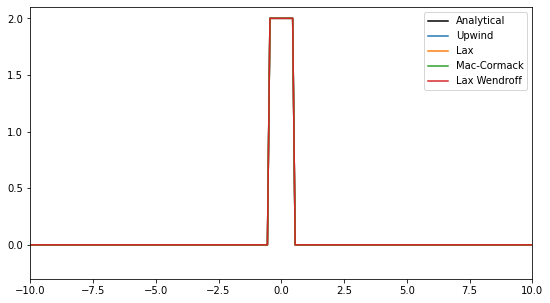

In [ ]:
'''This is to Animate and display the results'''
#This takes time on Google colab since it won't directly display the video and needs to be converted to html5 format
#(Expected time 6.5 minutes for dt=0.01 in the given problem)



import matplotlib.animation as animation
from IPython.display import HTML
fig=plt.figure(figsize=(9,5))
n=10
def animate(v):
    v=n*v
    plt.clf()
    plt.plot(x,u_analytic[:,v],'k',label='Analytical')
    #plt.plot(x,u_ftcs[:,v],'r--',label='FTCS')
    plt.plot(x,u_upwind[:,v],label='Upwind')
    plt.plot(x,u_lax[:,v],label='Lax')
    plt.plot(x,u_maccormack[:,v],label='Mac-Cormack')
    plt.plot(x,u_laxwendroff[:,v],label='Lax Wendroff')
    plt.legend()
    plt.xlim(-10,10)
    plt.ylim(-0.3,2.1)

ani = animation.FuncAnimation(fig, animate, frames=int(len(t)/n), interval=4000*n*dt)
matplotlib.rcParams['animation.embed_limit'] = 2**(246*4)
HTML(ani.to_html5_video())

